<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_02_Arboles/03E_%7C_Ejercicio_Precio_Coches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 EJERCICIO: Precio Coches Segunda Mano
[Aquí](https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/coches_usados_esp.csv) teneis un dataset sobre el precio de diversos coches de segunda mano. 

Prueba distintos modelos basados en árboles (árboles de decisión, Random Forest y Gradient Boosting) que predigan el precio de un coche.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1jRg7Dk2y_2_fxnC_Jpj5aWcqgW9t1KAd7izdmWzv9Sk/edit?usp=sharing)
*   [Enlace a este notebook](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_02_Arboles/03E_%7C_Ejercicio_Precio_Coches.ipynb)




## 0101 Import
Puedes importar aquí las librerías que creas que vas a necesitar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn import ensemble

## 0102 Carga el dataset del precio de coches
Aquí teneis el url del archivo raw del dataset sobre el precio de diversos coches de segunda mano. 

https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/coches_usados_esp.csv 

Importa los datos en un dataframe llamado **dataframe df**.

In [2]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/coches_usados_esp.csv'

# Importa csv
df = pd.read_csv(url, sep=';')

# Visualización primeras filas
df.head()

,ID,make,model,version,months_old,power,sale_type,num_owners,gear_type,fuel_type,kms,price
0,97860,Porsche,911,Carrera 4 S Coup�,240.0,210.0,classic,3.0,manual,gasoline,202000.0,999999
1,27821,Ford,Mustang,Gt500 Cabrio Vendido,54.0,487.0,used,1.0,manual,gasoline,30000.0,685000
2,97801,Porsche,911,3.3 Turbo Targa (Precio A Consultar),358.0,220.0,used,NaN,manual,gasoline,56300.0,555555
3,98251,Porsche,911,R Unidad 343 De 991-Iva Deducible,14.0,368.0,used,1.0,manual,gasoline,2800.0,470000
4,98250,Porsche,911,Gt2 Rs,3.0,515.0,used,NaN,NaN,gasoline,10.0,450000


# 02 EDA
Para familiarizarte con los datos puedes realizar un pequeño análisis exploratorio visual. Puedes usar los métodos .shape, .info(), .describe(), por ejemplo para entender su tamaño y sus variables. 

Recuerda que puedes encontrar mis clases sobre análisis exploratorio [aquí](https://github.com/JotaBlanco/TheValley/tree/main/EDA/).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93991 entries, 0 to 93990
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          93991 non-null  int64  
 1   make        93991 non-null  object 
 2   model       93991 non-null  object 
 3   version     93991 non-null  object 
 4   months_old  93717 non-null  float64
 5   power       93504 non-null  float64
 6   sale_type   93979 non-null  object 
 7   num_owners  22660 non-null  float64
 8   gear_type   92710 non-null  object 
 9   fuel_type   93926 non-null  object 
 10  kms         93127 non-null  float64
 11  price       93991 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 8.6+ MB


In [4]:
df.describe()

,ID,months_old,power,num_owners,kms,price
count,93991.00000,93717.000000,93504.000000,22660.000000,93127.000000,93991.000000
mean,55100.87935,63.094775,99.729477,1.055119,82702.565250,16587.291379
std,33119.32602,56.837686,42.698809,0.277124,75186.697789,15563.712383
min,25.00000,1.000000,0.000000,1.000000,0.000000,200.000000
25%,25452.50000,16.000000,77.000000,1.000000,18300.000000,8500.000000
50%,53896.00000,46.000000,88.000000,1.000000,66000.000000,13490.000000
75%,83573.50000,96.000000,110.000000,1.000000,129000.000000,19999.000000
max,113143.00000,374.000000,809.000000,11.000000,497000.000000,999999.000000


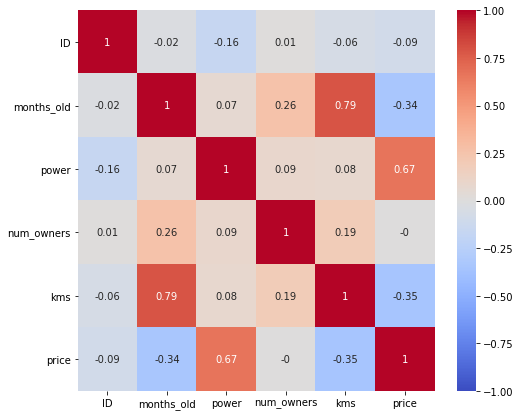

In [5]:
# Visualización coeficientes Pearson
plt.figure(figsize=(8,7))
sns.heatmap(np.round(df.corr(),2), 
            vmin=-1, vmax=1, 
            annot=True, cmap="coolwarm")
plt.show()

# 03 Preparación de los datos
El dataframe tiene algunos nulos, así como variables categóricas y presencia de ciertas variables que probablemente no queramos usar. Necesitamos limpiarlo antes de poder entrenar los modelos.

## 0301 Variables Útiles
De entre las variables disponibles, quedémonos con la que queramos utilizar como predictoras para el estudio.

In [6]:
df.head()

,ID,make,model,version,months_old,power,sale_type,num_owners,gear_type,fuel_type,kms,price
0,97860,Porsche,911,Carrera 4 S Coup�,240.0,210.0,classic,3.0,manual,gasoline,202000.0,999999
1,27821,Ford,Mustang,Gt500 Cabrio Vendido,54.0,487.0,used,1.0,manual,gasoline,30000.0,685000
2,97801,Porsche,911,3.3 Turbo Targa (Precio A Consultar),358.0,220.0,used,NaN,manual,gasoline,56300.0,555555
3,98251,Porsche,911,R Unidad 343 De 991-Iva Deducible,14.0,368.0,used,1.0,manual,gasoline,2800.0,470000
4,98250,Porsche,911,Gt2 Rs,3.0,515.0,used,NaN,NaN,gasoline,10.0,450000


In [7]:
df.columns

Index(['ID', 'make', 'model', 'version', 'months_old', 'power', 'sale_type',
       'num_owners', 'gear_type', 'fuel_type', 'kms', 'price'],
      dtype='object')

In [8]:
cols = ['make', 'model', 'months_old', 'power', 'sale_type',
       'num_owners', 'gear_type', 'fuel_type', 'kms', 'price']

cat_cols = ['make', 'model', 'sale_type', 'gear_type', 'fuel_type']

In [9]:
df = df[cols]
df.head()

,make,model,months_old,power,sale_type,num_owners,gear_type,fuel_type,kms,price
0,Porsche,911,240.0,210.0,classic,3.0,manual,gasoline,202000.0,999999
1,Ford,Mustang,54.0,487.0,used,1.0,manual,gasoline,30000.0,685000
2,Porsche,911,358.0,220.0,used,NaN,manual,gasoline,56300.0,555555
3,Porsche,911,14.0,368.0,used,1.0,manual,gasoline,2800.0,470000
4,Porsche,911,3.0,515.0,used,NaN,NaN,gasoline,10.0,450000


## 0302 Dumificación de variables categóricas
Recuerda que debemos transformar las variables categóricas para convertirlas en numéricas.

In [10]:
df = pd.get_dummies(df[cols], 
                      prefix_sep='_', 
                      drop_first=True, 
                      columns=cat_cols)

display(len(df))
df.head()

93991

,months_old,power,num_owners,kms,price,make_Audi,make_Bentley,make_Bmw,make_Chevrolet,make_Chrysler,make_Citroen,make_Dacia,make_Ds,make_Fiat,make_Ford,make_Honda,make_Hyundai,make_Iveco,make_Jaguar,make_Jeep,make_Kia,make_Land,make_Mazda,make_Mercedes-Benz,make_Mini,make_Mitsubishi,make_Nissan,make_Opel,make_Peugeot,make_Porsche,make_Renault,make_Saab,make_Seat,make_Skoda,make_Smart,make_Ssangyong,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,...,model_V220,model_V40,model_V40Cc,model_V60,model_Vectra,model_Verso,model_Viano,model_Vito,model_Vivaro,model_Voyager,model_Wrangler,model_X-Trail,model_X1,model_X3,model_X4,model_X5,model_X6,model_Xc60,model_Xc90,model_Xe,model_Xf,model_Xsara,model_XsaraPicasso,model_Yaris,model_Z4,model_Zafira,model_ZafiraTourer,sale_type_classic,sale_type_demo,sale_type_km_0,sale_type_new,sale_type_used,gear_type_manual,gear_type_semi-automatic,fuel_type_LPG,fuel_type_diesel,fuel_type_electric,fuel_type_etanol,fuel_type_gasoline,fuel_type_hybrid
0,240.0,210.0,3.0,202000.0,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,54.0,487.0,1.0,30000.0,685000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,358.0,220.0,NaN,56300.0,555555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
3,14.0,368.0,1.0,2800.0,470000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
4,3.0,515.0,NaN,10.0,450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


## 0303 Limpieza de nulos
Con la dumificación hemos eliminado los nulos en las columnas categóricas sin deshacernos de las filas. Queda algún nulo en las variables numéricas? 

Recuerda que puedes mirarlo con dataframe.isna().sum() y si sí hay nulos, puedes rellenarlos con el método .fillna().

In [11]:
# Rellenamos los nulos de las variables numéricas
df[['months_old', 'power', 'num_owners', 'kms', 'price']].isna().sum()

months_old      274
power           487
num_owners    71331
kms             864
price             0
dtype: int64

In [12]:
# Hay muchos nulos en num_owners
# Quizás esto tiene que ver con origenes del coche desconocidos?
# Vamos a limpiar la variable en 1, 2, 3+, nulo y la utilizamos como categórica
filtro_muchos_owners = df['num_owners']>=3
df.loc[filtro_muchos_owners, 'num_owners'] = '3+'
df = pd.get_dummies(df, prefix_sep='_', 
                   dummy_na=True,
                   drop_first=True, 
                   columns=['num_owners'])
df.head()

,months_old,power,kms,price,make_Audi,make_Bentley,make_Bmw,make_Chevrolet,make_Chrysler,make_Citroen,make_Dacia,make_Ds,make_Fiat,make_Ford,make_Honda,make_Hyundai,make_Iveco,make_Jaguar,make_Jeep,make_Kia,make_Land,make_Mazda,make_Mercedes-Benz,make_Mini,make_Mitsubishi,make_Nissan,make_Opel,make_Peugeot,make_Porsche,make_Renault,make_Saab,make_Seat,make_Skoda,make_Smart,make_Ssangyong,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,model_118,...,model_V60,model_Vectra,model_Verso,model_Viano,model_Vito,model_Vivaro,model_Voyager,model_Wrangler,model_X-Trail,model_X1,model_X3,model_X4,model_X5,model_X6,model_Xc60,model_Xc90,model_Xe,model_Xf,model_Xsara,model_XsaraPicasso,model_Yaris,model_Z4,model_Zafira,model_ZafiraTourer,sale_type_classic,sale_type_demo,sale_type_km_0,sale_type_new,sale_type_used,gear_type_manual,gear_type_semi-automatic,fuel_type_LPG,fuel_type_diesel,fuel_type_electric,fuel_type_etanol,fuel_type_gasoline,fuel_type_hybrid,num_owners_2.0,num_owners_3+,num_owners_nan
0,240.0,210.0,202000.0,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,54.0,487.0,30000.0,685000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
2,358.0,220.0,56300.0,555555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
3,14.0,368.0,2800.0,470000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
4,3.0,515.0,10.0,450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [13]:
df[['months_old', 'power', 'kms', 'price']].isna().sum()

months_old    274
power         487
kms           864
price           0
dtype: int64

In [14]:
for col in ['months_old', 'power', 'kms']:
  df[col] = df[col].fillna(df[col].median())

In [15]:
df.isna().sum()

months_old            0
power                 0
kms                   0
price                 0
make_Audi             0
                     ..
fuel_type_gasoline    0
fuel_type_hybrid      0
num_owners_2.0        0
num_owners_3+         0
num_owners_nan        0
Length: 301, dtype: int64

# 04 Train - test split
Separamos el set de datos en dos utilizando [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [16]:
# Primero generamos la matriz X con las variables predictoras 
# y el vector y con la variable a predecir
X = df.drop('price',axis=1)
y = df['price']

# Comprueba sus tamaños
X.shape, y.shape

((93991, 300), (93991,))

In [17]:
# Haz la partición train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Comprueba sus tamaños
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62973, 300), (31018, 300), (62973,), (31018,))

# 05 Entrena tus modelos
Entrena distintos modelos basados en árboles (Árbol de Decisión, Random Forest y Gradient Boosting) optimizando el equilibrio bias-variance y selecciona el mejor.

In [18]:
def entrenar_modelo_y_predecir(modelo):
  # Entreno el árbol con el set de entrenamiento
  modelo = modelo.fit(X=X_train, y=y_train)
  # Uso el árbol para predecir sobre el dataset de entrenamiento
  y_pred_train = modelo.predict(X_train)
  # Uso el árbol para predecir sobre el dataset de test
  y_pred_test = modelo.predict(X_test)
  # Calidad predicción train
  rmse_train = round(mean_squared_error(y_train, y_pred_train, squared=False), 2)
  print('RMSE en set de entrenamiento :', rmse_train)
  # Calidad predicción test
  rmse_test = round(mean_squared_error(y_test, y_pred_test, squared=False), 2)
  print('RMSE en set de test :', rmse_test)
  # Degradación de la predicción
  print('Degradación: ' + str(round((rmse_test-rmse_train)/rmse_train*100,2)) + '%')

## 0501 Árbol de Decisión

In [19]:
# Define el árbol
modelo_arbol = tree.DecisionTreeRegressor(
    max_depth=50, 
    min_samples_split = 10,
    min_samples_leaf = 5)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_arbol)

RMSE en set de entrenamiento : 5555.82
RMSE en set de test : 5813.18
Degradación: 4.63%


## 0502 Random Forest

In [24]:
# Define el modelo de Random Forest
modelo_RF = ensemble.RandomForestRegressor(
    n_estimators = 100,
    max_features = "auto",
    max_depth = 10, 
    min_samples_split = 10,
    min_samples_leaf = 5)

# Entrena y evalúa el modelo
entrenar_modelo_y_predecir(modelo_RF)

RMSE en set de entrenamiento : 6166.05
RMSE en set de test : 5365.07
Degradación: -12.99%


In [ ]:
# Define el modelo de Random Forest
modelo_RF = ensemble.RandomForestRegressor(
    n_estimators = 200,
    max_features = "auto",
    max_depth = 10, 
    min_samples_split = 10,
    min_samples_leaf = 5)

# Entrena y evalúa el modelo
entrenar_modelo_y_predecir(modelo_RF)

## 0503 Gradient Boosting

In [ ]:
modelo_GB = ensemble.GradientBoostingRegressor(
    n_estimators = 200, 
    learning_rate = 0.01,
    max_depth = 8, 
    min_samples_split = 10,
    min_samples_leaf = 5)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_GB)